<a href="https://colab.research.google.com/github/carlosheds/DIO-LabProject-ReducaoDeDimensionalidadeEmImagensParaRedesNeurais/blob/master/Redu%C3%A7%C3%A3o_de_Dimensionalidade_em_Imagens_Usando_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from google.colab import drive
from PIL import Image
from io import BytesIO
from IPython.display import display

In [45]:
def redimensionar_imagem(img, nova_largura=320):
    try:
        largura, altura = img.size
        aspect_ratio = altura / largura
        nova_altura = int(nova_largura * aspect_ratio)
        nova_img = img.resize((nova_largura, nova_altura))
        return nova_img
    except FileNotFoundError:
        print(f"Error: Imagem não encontrada {img}")
        return None
    except Exception as e:
        print(f"Ocorreu um erro: {e}")
        return None

In [46]:
def comprimir_imagem(imagem, qualidade=85):
    try:
        buffer = BytesIO()
        imagem.save(buffer, "JPEG", optimize=True, quality=qualidade)  # Use JPEG para compressão
        buffer.seek(0)
        nova_imagem = Image.open(buffer)
        return nova_imagem
        return
    except Exception as e:
        print(f"Ocorreu um erro ao comprimir a imagem: {e}")
        return None

In [19]:
def converter_para_cinza(imagem):
    largura, altura = imagem.size
    imagem_cinza = Image.new("L", (largura, altura))  # Escala de cinza

    for y in range(altura):
        for x in range(largura):
            r, g, b = imagem.getpixel((x, y))
            valor_cinza = int(0.299 * r + 0.587 * g + 0.114 * b)
            imagem_cinza.putpixel((x, y), valor_cinza)

    return imagem_cinza

In [7]:
def binarizar_imagem(imagem_cinza, limiar=127):
    largura, altura = imagem_cinza.size
    imagem_binaria = Image.new("1", (largura, altura))  # Binária

    for y in range(altura):
        for x in range(largura):
            valor_cinza = imagem_cinza.getpixel((x, y))
            valor_binario = 1 if valor_cinza > limiar else 0
            imagem_binaria.putpixel((x, y), valor_binario)

    return imagem_binaria

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Imagem Original:


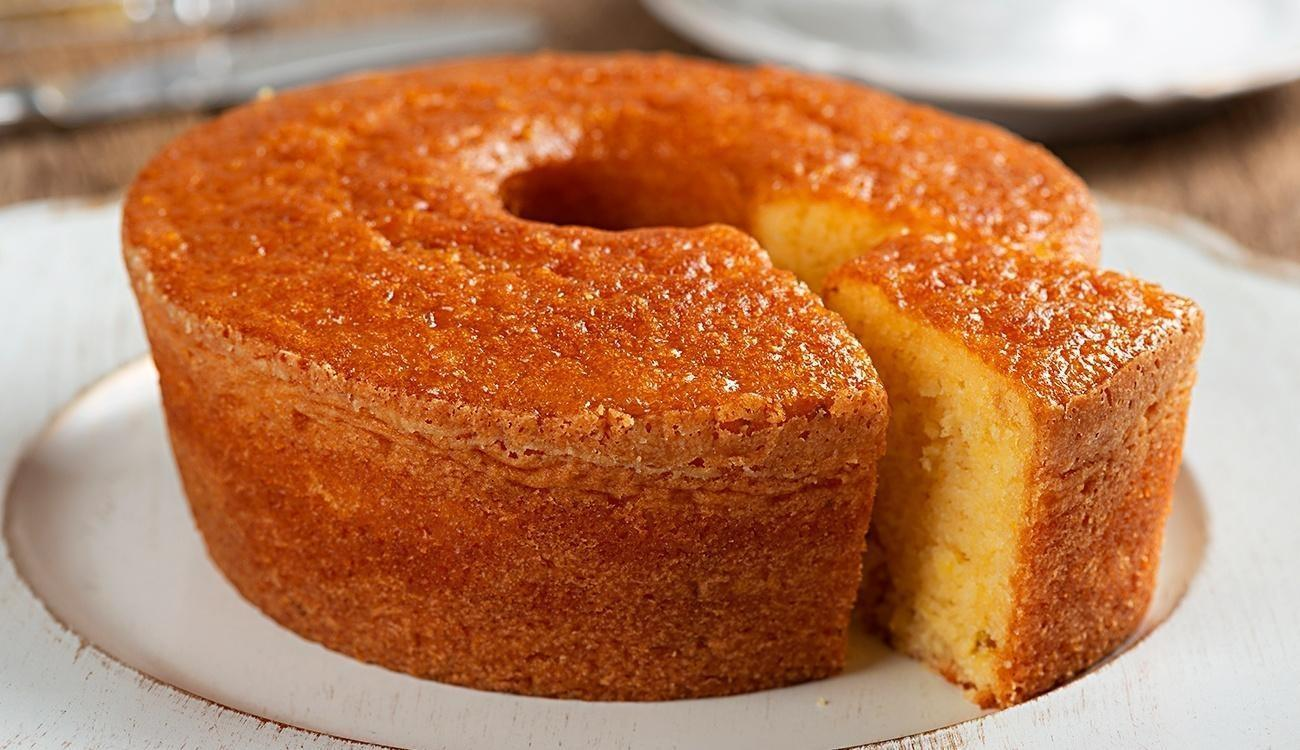

Imagem tratada (redimensionada):


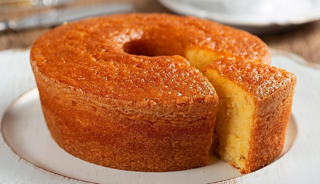

Imagem tratada (comprimida): 


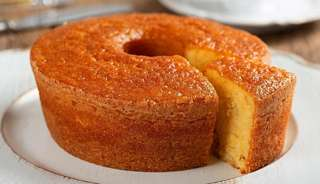

Imagem em Tons de Cinza:


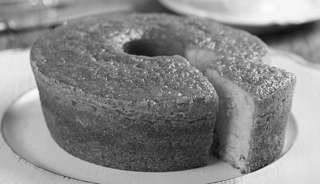

Imagem Binarizada:


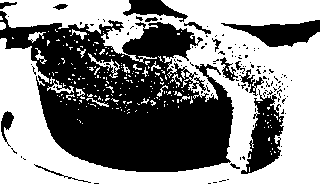

In [47]:
drive.mount('/content/drive')
caminho_imagem = "/content/drive/My Drive/Estudos/DIO---Digital-Innovation-One/Bootcamps/BairesDev - Machine Learning Practitioner/bolo.jpg"
imagem_original = Image.open(caminho_imagem)

# Redimensionar imagem
imagem_redimensionada = redimensionar_imagem(imagem_original)

#Comprimir imagem
imagem_comprimida = comprimir_imagem(imagem_redimensionada, qualidade=60)

# Converter a imagem para cinza
imagem_cinza = converter_para_cinza(imagem_comprimida)

# Binarizar a imagem
imagem_binaria = binarizar_imagem(imagem_cinza)

# Exibir as imagens processadas
print("Imagem Original:")
display(imagem_original)
print("Imagem tratada (redimensionada):")
display(imagem_redimensionada)
print("Imagem tratada (comprimida): ")
display(imagem_comprimida)

print("Imagem em Tons de Cinza:")
display(imagem_cinza)

print("Imagem Binarizada:")
display(imagem_binaria)